## 问答题
1. 支持向量机的基本思想是什么？

2. 什么是支持向量？

3. 在使用 SVM 时，缩放输入值为什么很重要？

4. SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？

5. 你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？

6. 假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。
   你应该增大还是减小 γ（gamma）？C 呢？

7. ε 不敏感模型是什么意思？

8. 使用核技巧有什么意义？

In [ ]:
# 1：支持向量机（SVM）的核心思想是在特征空间中找到一个最优超平面，实现对不同类别的数据点进行分隔，且使这个超平面与两类数据中最近的点之间的距离（即 “间隔”）最大化。
# 2：支持向量是指距离最优超平面最近的那些数据点，它们直接决定了超平面的位置和方向。
# 3：SVM 的目标是最大化间隔，而间隔的计算依赖于特征的尺度；缩放可以使所有特征处于相同的尺度，确保每个特征对模型的影响权重更均衡，从而提高模型的性能和收敛速度
# 4：SVM 可以输出实例到超平面的距离作为置信度分数。SVM 默认不输出概率，但可以通过设置probability=True（如sklearn中的SVC），使用 Platt 缩放（一种对 SVM 输出进行校准的方法）来生成概率。
# 5：LinearSVC	仅支持线性核，训练速度快，内存效率高，对高维数据友好。	大数据集、线性可分或近似线性可分问题，追求效率时。
# SVC	支持线性核、RBF 核等多种核函数，适用于非线性问题，但训练速度较慢。	中小数据集、非线性问题，需要核技巧处理复杂关系时。
# SGDClassifier	基于随机梯度下降优化，支持线性核，可通过loss='hinge'模拟 SVM，适合超大数据集。	超大规模数据集，无法一次性加载到内存中，且可接受近似解时。
# 6：假设使用 RBF 核训练的 SVM 分类器欠拟合训练集，应该增大还是减小 γ（gamma）？C 呢？
# γ（gamma）：控制 RBF 核的 “高斯半径”，决定单个样本对周围点的影响范围。
# γ 值越小，影响范围越大，模型越简单（易欠拟合）；
# γ 值越大，影响范围越小，模型越复杂（易过拟合）。
# 因此，欠拟合时应增大 γ，让模型更关注局部数据模式。
# C：控制正则化强度，C 值越小，正则化越强（模型越简单，易欠拟合）；C 值越大，正则化越弱（模型越复杂，易过拟合）。
# 因此，欠拟合时应增大 C，降低正则化强度，让模型更好地拟合训练数据。
# 7：ε 不敏感模型是SVM 用于回归任务（SVR，支持向量回归）的核心思想，指：
# 对于预测值与真实值的误差小于等于 ε 的样本，模型不计算损失（视为 “可接受误差”）；
# 仅当误差大于 ε 时，才计算超出部分的损失（即 “ε 不敏感损失函数”）。
# 目标是找到一个超平面，使尽可能多的样本落在 ε 误差带内，同时使超平面的间隔最大化。
# 8：避免高维映射的计算开销；增强模型对非线性关系的拟合能力

## 编程题
1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？

   "一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

---

2. 提前预习 **10_支持向量机.ipynb** 最新更新的笔记 （把SVM分类用梯度下降实现）； 大概理解笔记后，尝试自己对照笔记 实现用梯度下降实现SVM分类

   并把自定义的SVM分类用于 iris data(鸢尾花数据)； 取花瓣长度 和 花瓣宽度特征， 分类 看是不是 分类2的花 （(iris.target == 2)

   对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果



In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [2]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9814814814814815

自定义SVM分类器性能:
准确率: 1.0000
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


sklearn SVM分类器性能:
准确率: 1.0000
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 29923 (\N{CJK UNIFIED IDEOGRAPH-74E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_26464\1772536952.py:145: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEO

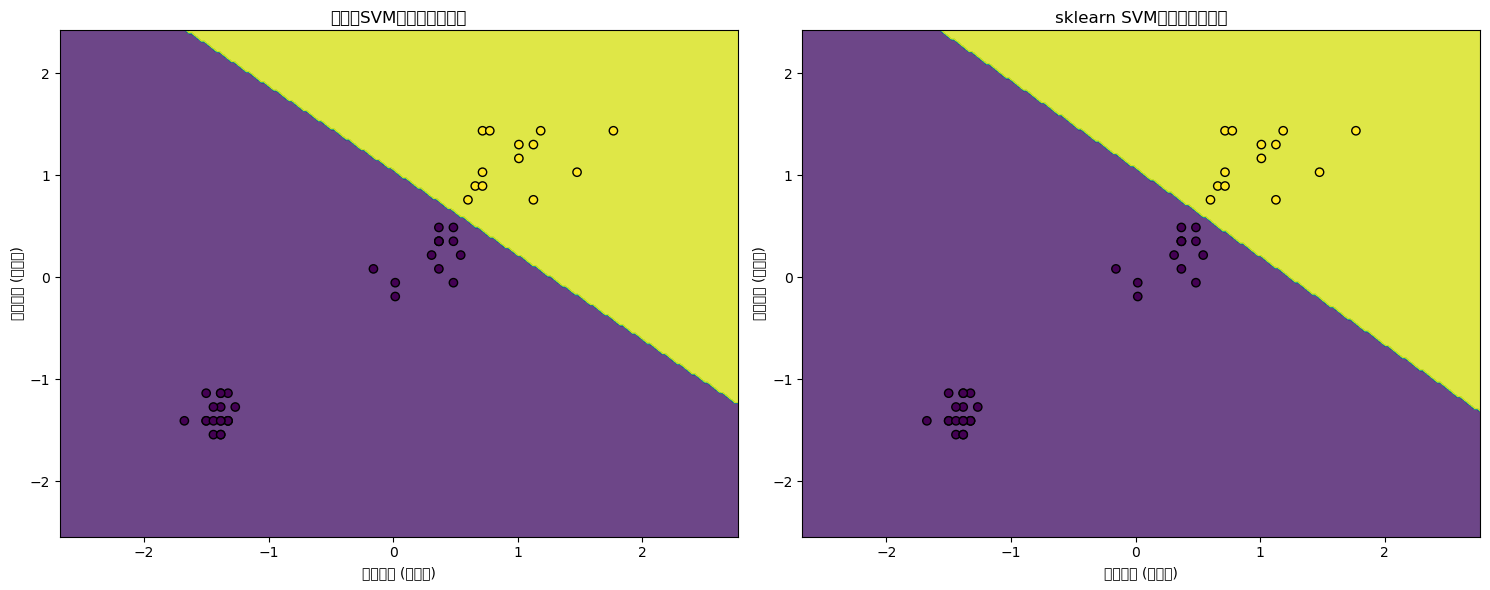


模型参数对比:
自定义SVM权重: [1.72998051 2.09290675]
自定义SVM偏置: -2.18999999999987
sklearn SVM权重: [[1.79077671 2.07758057]]
sklearn SVM偏置: [-2.21497014]


In [3]:
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
from sklearn import datasets  # 从sklearn导入数据集
from sklearn.model_selection import train_test_split  # 导入数据集拆分工具
from sklearn.preprocessing import StandardScaler  # 导入特征标准化工具
from sklearn.svm import SVC  # 从sklearn导入SVM分类器
from sklearn.metrics import accuracy_score, classification_report  # 导入评估指标

# 1. 加载鸢尾花数据集并进行预处理
iris = datasets.load_iris()  # 加载鸢尾花数据集
# 提取花瓣长度(第2列)和花瓣宽度(第3列)作为特征
X = iris.data[:, [2, 3]]
# 构建二分类目标：判断是否为类别2的花，转换为0和1
y = (iris.target == 2).astype(np.int32)
# 将标签转换为SVM常用的+1(正类)和-1(负类)表示
y = np.where(y == 1, 1, -1)

# 划分训练集(70%)和测试集(30%)，设置随机种子保证结果可复现
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 初始化标准化器
scaler = StandardScaler()
# 对训练集进行标准化(计算均值和方差并转换)
X_train_scaled = scaler.fit_transform(X_train)
# 使用训练集的标准化参数对测试集进行转换
X_test_scaled = scaler.transform(X_test)

# 2. 实现基于梯度下降的自定义SVM分类器
class CustomSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        self.learning_rate = learning_rate  # 梯度下降的学习率
        self.lambda_param = lambda_param    # 正则化参数，控制正则化强度
        self.n_iterations = n_iterations    # 梯度下降的迭代次数
        self.weights = None  # 权重参数，将在训练时初始化
        self.bias = None     # 偏置参数，将在训练时初始化

    def fit(self, X, y):
        # 获取样本数量和特征数量
        n_samples, n_features = X.shape

        # 初始化权重为全0向量，偏置为0
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 梯度下降迭代
        for _ in range(self.n_iterations):
            # 遍历每个样本
            for idx, x_i in enumerate(X):
                # 检查样本是否满足SVM的分类条件：y_i*(w·x_i + b) >= 1
                # 满足条件时，该样本不参与损失计算(hinge loss为0)
                condition = y[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1

                if condition:
                    # 满足分类条件：只有正则化项的梯度
                    dw = self.lambda_param * self.weights  # 权重梯度
                    db = 0  # 偏置梯度为0
                else:
                    # 不满足分类条件：同时有损失项和正则化项的梯度
                    dw = self.lambda_param * self.weights - y[idx] * x_i  # 权重梯度
                    db = -y[idx]  # 偏置梯度

                # 根据梯度更新权重和偏置(梯度下降)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        # 计算线性输出：w·x + b
        linear_output = np.dot(X, self.weights) + self.bias
        # 返回符号作为预测结果：正为1，负为-1
        return np.sign(linear_output)

# 3. 训练自定义SVM模型
# 实例化自定义SVM，设置学习率、正则化参数和迭代次数
custom_svm = CustomSVM(learning_rate=0.001, lambda_param=0.01, n_iterations=10000)
# 使用训练集训练模型
custom_svm.fit(X_train_scaled, y_train)

# 4. 训练sklearn的SVM模型作为对比
# 实例化sklearn的SVM，使用线性核(C是正则化参数的倒数)
sklearn_svm = SVC(kernel='linear', C=1.0)
# 使用训练集训练模型
sklearn_svm.fit(X_train_scaled, y_train)

# 5. 评估两个模型的性能
# 自定义SVM在测试集上的预测结果
custom_y_pred = custom_svm.predict(X_test_scaled)
# 计算自定义SVM的准确率
custom_accuracy = accuracy_score(y_test, custom_y_pred)

# sklearn SVM在测试集上的预测结果
sklearn_y_pred = sklearn_svm.predict(X_test_scaled)
# 计算sklearn SVM的准确率
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)

# 打印自定义SVM的评估结果
print("自定义SVM分类器性能:")
print(f"准确率: {custom_accuracy:.4f}")
# 打印详细分类报告(包含精确率、召回率、F1分数等)
print(classification_report(y_test, custom_y_pred))

# 打印sklearn SVM的评估结果
print("\nsklearn SVM分类器性能:")
print(f"准确率: {sklearn_accuracy:.4f}")
print(classification_report(y_test, sklearn_y_pred))

# 6. 可视化两个模型的决策边界
def plot_decision_boundary(X, y, model, title):
    # 设置绘图的坐标范围(比实际数据范围稍大)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 生成网格点，用于绘制决策边界
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 对网格点进行预测，用于绘制决策区域
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # 将预测结果转换为网格形状
    Z = Z.reshape(xx.shape)

    # 绘制决策区域(填充颜色)
    plt.contourf(xx, yy, Z, alpha=0.8)
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    # 设置标题
    plt.title(title)
    # 设置x轴标签
    plt.xlabel('花瓣长度 (标准化)')
    # 设置y轴标签
    plt.ylabel('花瓣宽度 (标准化)')

# 创建画布，设置大小为15x6
plt.figure(figsize=(15, 6))

# 绘制自定义SVM的决策边界(左图)
plt.subplot(1, 2, 1)
plot_decision_boundary(X_test_scaled, y_test, custom_svm, '自定义SVM分类器决策边界')

# 绘制sklearn SVM的决策边界(右图)
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_scaled, y_test, sklearn_svm, 'sklearn SVM分类器决策边界')

# 调整子图间距
plt.tight_layout()
# 显示图形
plt.show()

# 打印两个模型的参数，进行对比
print("\n模型参数对比:")
print(f"自定义SVM权重: {custom_svm.weights}")
print(f"自定义SVM偏置: {custom_svm.bias}")
print(f"sklearn SVM权重: {sklearn_svm.coef_}")
print(f"sklearn SVM偏置: {sklearn_svm.intercept_}")
